In [ ]:
# default_exp pid_control

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control

# PID Control

## Standard Feedback Loop

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/standard-control-loop.png" alt="standard-control-loop" style="width: 550px;"/> </td>
</tr>
</table>

- A common way to design a control system is to use PID control. 
- PID = Proportional-Integral-Derivative
   - Describes how the error term is treated before being sum and sent into the plant 

- It is a simple and effective controller in a wide range of applications
- Majority of controllers in industrial applications are PIDs


The general structure of a PID controller is:

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/PID-Controller-general.png" alt="PID-Controller-general" style="width: 550px;"/> </td>
</tr>
</table>


- The three gains $K_p, K_i, K_d$ are adjustable and can be tuned to the specific application
- Varying $K_p, K_i, K_d$ means adjusting how sensitive the system is across the three paths


Will consider each in turn, using an example transfer function

$$
G(s) = \frac{A}{s^2+a_1s+a_2}
$$


## Proportional (P) control

In proportional control, the control law is simply a gain $K_p$, so that $u$ is proportional to $e$:

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/PID-Controller-Proportional.png" alt="PID-Controller-Proportional" style="width: 550px;"/> </td>
</tr>
</table>

$$
u(t) = K_p e(t)
$$

Let's consider our system and its characteristic equation:

$$ 1 + K_p G(s) = 0 $$

$$ 1 + K_p \frac{A}{s^2+a_1s+a_2} = 0 $$

$$ \Rightarrow s^2+a_1s+a_2 + K_pA = 0 $$

Since we know:

$$
s^2+2\zeta\omega_n s+ \omega_n^2 = 0 
$$

$$
s_{1,2} = -\zeta\omega_n \pm \omega_n\sqrt{(1-\zeta^2)}j
$$

The resulting natural frequency is:

$$ w_n = \sqrt{a_2+K_pA} $$

- Increasing $K_p$ increases the natural frequency, 
- Note that the dumping ratio is reduced (we do not change $a_1$). 

If we plot the position of the poles in the Root Locus:

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/PID-Controller-Proportional-Root-Locus.png" alt="PID-Controller-Proportional-Root-Locus" style="width: 550px;"/> </td>
</tr>
</table>


Proportial error and output:

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/PID-Controller-Proportional-Error.png" alt="PID-Controller-Proportional-Error" style="width: 450px;"/> </td>
</tr>
</table>

- Output is the error scaled by the gain $K_p$
- When error is large, output is large
- When error is small, output is small

## Derivative (D) control

To add damping to a system, it is often useful to add a derivative term to the control,

$$
u(t) = K_p e(t) + K_d\dot{e}(t)
$$

or

$$
U(s) = K_p E(s) + K_d sE(s) 
= (K_p+K_ds)E(s)
= K(s) E(s)
$$



And the characteristic equation is:

$$
0 = 1+K(s)G(s) 
$$

$$
1 + \frac{(K_p + K_ds) A}{s^2+a_1s+a_2}
$$

$$
0 = s^2 + (a_1+K_dA)s + (a_2 + K_p)
$$

- _In this example_, increasing K_d increases the damping ratio without changing the natural frequency.
- For other $G(s)$ the result might differ!

When we keep $K_p$ fixed, and vary $K_d$ the Root Locus changes:

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/PID-Controller-Proportional-Derivative-Error.png" alt="PID-Controller-Proportional-Derivative-Error" style="width: 450px;"/> </td>
</tr>
</table>

- In the derivative path is the rate of change of the error that contributes to the output of the controller
- The faster the change the larger the output

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/PID-Control-Derivative-Path.png" alt="PID-Controller-Derivative-Path" style="width: 450px;"/> </td>
</tr>
</table>


## Integral (I) control

Especially if the plant is a type 0 system, we may want to add integrator to controller to drive steady-state error to zero:

$$
U(s) = (K_p + \frac{K_I}{s} + K_d s) E(s)
$$

- In the integral path, as the error moves over time the integral continually sum it up (multiplying it by the constant $K_$

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/PID-Control-Integral-Path.png" alt="PID-Control-Integral-Path" style="width: 450px;"/> </td>
</tr>
</table>

- The integral path is used to remove constant errors
- Even small errors accumulates and add up to adjust the controller output

## Comments

- Not all PID paths must be present (set the corresponding constant to zero)
- Making a simple controller is better when all requirements are met
  - Easy to implement
  - Easy to test, tune and troubleshoot
  - Easy to understand by other people
- This is also why PID are so widdespread even if there are a lot of controller types available

## Diving a little deeper

- The PID transfer function:

$$
PID(s) = K_p + \frac{K_I}{s} + K_d s = \frac{K_ds^2 + K_p s + K_I}{s} = k_p\Big( 1+\frac{1}{\tau s} + \tau_d s \Big) = K_p \frac{\tau_I\tau_ds^2 + \tau_Is+1}{\tau_Is}
$$

- $\tau_I, \tau_D$: integral and derivative time constant (paramenters)

- Note that the PID has one pole at the origina and two zeros in: 

$$
s_{1,2} = \frac{-\tau_I \pm \sqrt{\tau_I(\tau_I-4\tau_d)}}{2\tau_I\tau_d}
$$

- This is an ideal PID; 
- A real PID has high frequency poles (high frequency roll off of the frequency response)



### Comments

- Pole at the origin ensures steady state performance
- Two zeros and gain $K_p$ makes it possible to achieve the desired transient behaviour
- Using a PID makes is possible to use a standard controller, but this also limits the design freedom


<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/PID-Controller-mounting-2.png" alt="PID-Controller-mounting" style="width: 550px;"/> </td>
</tr>
</table>

- The derivative action might lead to large control outputs at high frequency
- Might be better to use the derivative of the output signal ($e(t)=y(t)$)

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/PID-Controller-mounting-1.png" alt="PID-Controller-mounting" style="width: 550px;"/> </td>
</tr>
</table>



## Integral Windup

- If the integral of the error grows too much, the control output might hit actuation limits
- The integral output produces control outputs even when error is zero.

In [ ]:
time = np.arange(0, 10, 0.1)

e = []
int_e = []
int_e.append(0)
for t in time:
    e.append(0.3*(-t+5))
    int_e.append((int_e[-1]+e[-1]))

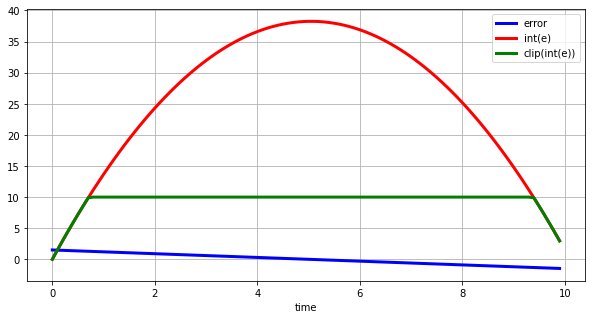

In [ ]:
fig, axs = plt.subplots(1, figsize=(10,5))
plt.plot(time, e, color='b', label='error', linewidth=3)
plt.plot(time, int_e[:-1], color='r', label='int(e)', linewidth=3)
plt.plot(time, np.clip(np.array(int_e[:-1]), -10, 10), color='g', label='clip(int(e))', linewidth=3)
plt.grid()
plt.legend();
plt.xlabel('time');

### Solutions

- Initializing the controller integral to a desired value, for instance to the value before the problem
- Zeroing the integral value every time the error is equal to, or crosses zero. This avoids having the controller attempt to drive the system to have the same error integral in the opposite direction as was caused by a perturbation


In [ ]:
time = np.arange(0, 10, 0.1)

e = []
int_e = []
int_e.append(0)
for t in time:
    e.append(0.3*(-t+5))
    if abs(e[-1]) < 0.1:
        int_value = 0
    else:
        int_value = int_e[-1]+e[-1]
    int_e.append(int_value)

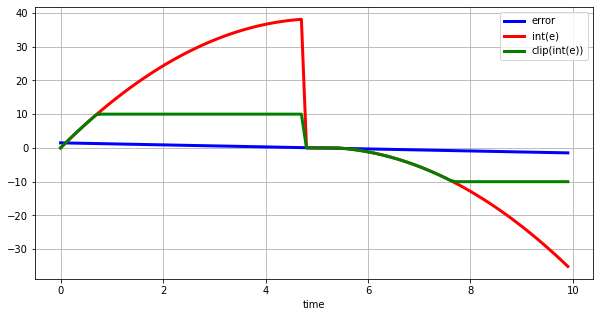

In [ ]:
fig, axs = plt.subplots(1, figsize=(10,5))
plt.plot(time, e, color='b', label='error', linewidth=3)
plt.plot(time, int_e[:-1], color='r', label='int(e)', linewidth=3)
plt.plot(time, np.clip(np.array(int_e[:-1]), -10, 10), color='g', label='clip(int(e))', linewidth=3)
plt.grid()
plt.legend();
plt.xlabel('time');

## PID Tuning: Ziegler and Nichols

- $G(s)$ BIBO stabile
- $G(0)>0$

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/PID-Controller-Proportional.png" alt="PID-Controller-Proportional" style="width: 550px;"/> </td>
</tr>
</table>

Steps:
- Close the loop with the proportional part only
- Apply step input and increase the gain until output starts to oscillate
- Record $K^*$ (critical gain) and $T_p^*$ (oscillation period) of the output. 
- Choose the PID parameters as:

| $R(s)$ | $K_p$     | $\tau_I$ | $\tau_d$ |
|--------|-------    |----------|----------|
| $P$    | $0.5K^*$  |          |          |
| $PI$   | $0.45K^*$ | $0.8T_p^*$ | |
| $PID$  | $0.6K^*$  | $0.5T_p^*$ | $01258T_p^*$ |


- These rules do not squeeze out the best possible performance


- $K^*$ is the gain margin with a proportional controller
- Critical frequency (for which $|L(jw)|=1$ is $\frac{2\pi}{T_p^*}$
- The rules means having a 6dB gain margin
- Integral term better steady state but slows down the system (reduces bandwidth and phase margin)
- Derivative term increases the bandwidth and phase margin

- Not possible to use when the plant is potentially dangerous
- Plants that are difficult to bring to oscillate using a proportional controller only (1st and 2nd order with infinite gain margin)

### Ziegler and Nicols in action

In [ ]:
s = control.tf([1, 0], [1])

G_s = 6.2/(2*s**3 + 3*s**2 +s + 1)

print(G_s)


         6.2
---------------------
2 s^3 + 3 s^2 + s + 1



Let's see what happens when we close the loop:

$$
R(s) = 1
$$

Measurement 
$$
H(s) = 0.042
$$

Step response with no controller:

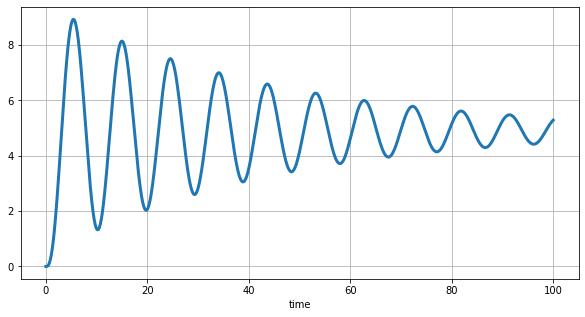

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,5))
t_out, y_out = control.step_response(control.feedback(G_s, 0.042, sign=-1), T=100)
plt.plot(t_out, y_out, linewidth=3)
plt.grid()
plt.xlabel('time');

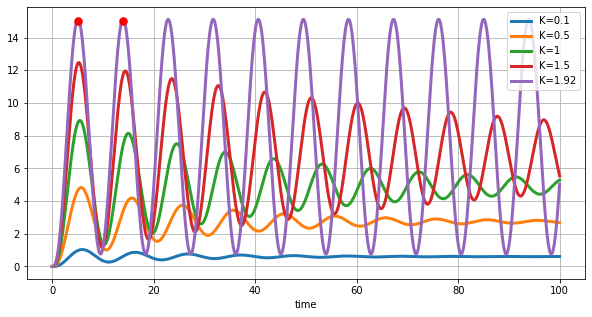

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,5))
K_p_range = [0.1, 0.5, 1, 1.5, 1.92]
for K_p in K_p_range:
    t_out, y_out = control.step_response(control.feedback(K_p*G_s, 0.042, sign=-1), T=100)
    plt.plot(t_out, y_out, linewidth=3, label='K={}'.format(K_p))
    plt.grid()
    plt.xlabel('time');
plt.legend();

plt.plot(5.0, 15, marker='.', markersize=15, color='r')
plt.plot(13.95, 15, marker='.', markersize=15, color='r')


- Critical gain $K^*=1.92$
- Period $T_p^*=8.95$

In [ ]:
K_star = 1.92
T_p_start = 8.95

And we can then calculate the parameter of the PID from the ZN table

In [ ]:
K_p = 0.6*K_star
tau_I = 0.5*T_p_start
tau_d = 0.125*T_p_start

print('K_p:', K_p)
print('tau_I:', tau_I)
print('tau_d:', tau_d)

K_p: 1.152
tau_I: 4.475
tau_d: 1.11875


In [ ]:
PID = K_p*(tau_I*tau_d*s**2 + tau_I*s + 1)/(tau_I*s)

# Or in the standard form:
# K_I = K_p/tau_I
# K_d = K_p/tau_d
# PID = K_p + K_I/s + K_d*s

print(PID)


5.767 s^2 + 5.155 s + 1.152
---------------------------
          4.475 s



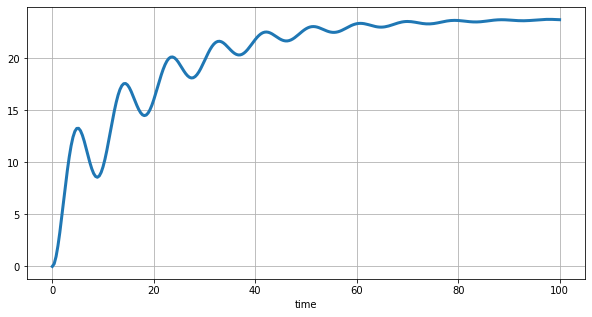

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,5))
t_out, y_out = control.step_response(control.feedback(PID*G_s, 0.042, sign=-1), T=100)
plt.plot(t_out, y_out, linewidth=3, label='PID')
plt.grid()
plt.xlabel('time');


- Performance can also be improved manually tuning the parameters further

## Example

$$
G(s) = \frac{1}{s^2+s+1}
$$

Requirements
- Rise time above $t_r=1s$
- Peak overshoot of $M_p=0.05$
- Zero steady-state error to step command

Let's consider the proportional controller first:

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/PID-Controller-Proportional.png" alt="PID-Controller-Proportional" style="width: 550px;"/> </td>
</tr>
</table>

The characteristic equation is:

$$
0 = s^2 + s + 1 + k_p
$$

with $k_p$ we can only change $w_n$ (and indirectly the damping ratio $\zeta$).

Since 

$$
t_r \approx \frac{1.8}{w_n}
$$

$$
t_r=1s \approx \frac{1.8}{w_n} \Rightarrow w_n \approx 1.8
$$